<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/sales_timestamp_Time_Series_dt_hour%2Cdt%2Cday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
sales = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')
sales.head()

#unix epoch time = timestamp with milliseconds

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [14]:
# convert the values in the timestamp field to datetimes
sales['timestamp'] = pd.to_datetime(sales['timestamp'], unit='ms')


In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   timestapm      datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 126.2+ MB


In [17]:
#extract different time units from the timestamp field. (quarter, month, day, hour, minutes)
sales['timestamp'].dt.date

0          2015-06-02
1          2015-06-02
2          2015-06-02
3          2015-06-02
4          2015-06-02
              ...    
2756096    2015-08-01
2756097    2015-08-01
2756098    2015-08-01
2756099    2015-08-01
2756100    2015-08-01
Name: timestamp, Length: 2756101, dtype: object

In [20]:
sales['date'] = sales['timestamp'].dt.date
sales['year'] = sales['timestamp'].dt.year
sales['month'] = sales['timestamp'].dt.month
sales['quarter'] = sales['timestamp'].dt.quarter
sales['weekday'] = sales['timestamp'].dt.weekday
sales['hour'] = sales['timestamp'].dt.hour
sales['day'] = sales['timestamp'].dt.day

In [21]:
sales.head()

,timestamp,visitorid,event,itemid,transactionid,timestapm,date,year,month,quarter,weekday,hour,day
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02,2015,6,2,1,5,2
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02,2015,6,2,1,5,2
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02,2015,6,2,1,5,2
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02,2015,6,2,1,5,2
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02,2015,6,2,1,5,2


In [23]:
#aggregate on each one, counting the number of records, and see what insights you can discover for each type of event.
#aggregate = groupby


In [25]:
sales['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [26]:
sales.groupby('hour').count()['event']

hour
0     144303
1     140702
2     145879
3     150860
4     147184
5     119572
6      76972
7      43944
8      25309
9      17909
10     16408
11     20330
12     31486
13     51089
14     81823
15    129092
16    161784
17    179651
18    181200
19    183348
20    187919
21    184297
22    175956
23    159084
Name: event, dtype: int64

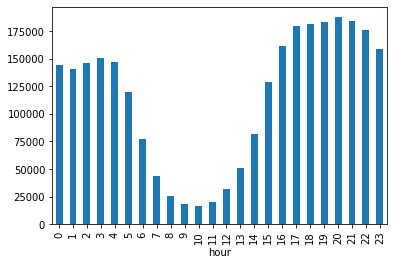

In [28]:
sales.groupby('hour').count()['event'].plot(kind='bar')

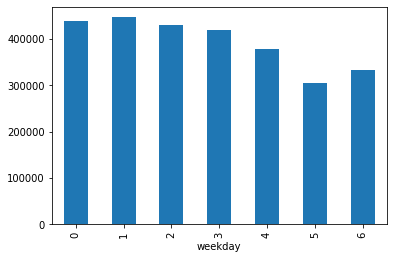

In [29]:
sales.groupby('weekday').count()['event'].plot(kind='bar')

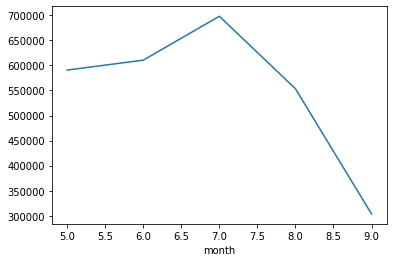

In [31]:
sales.groupby('month').count()['event'].plot(kind='line') 
#same plot as above but kind = line as opposed to bar

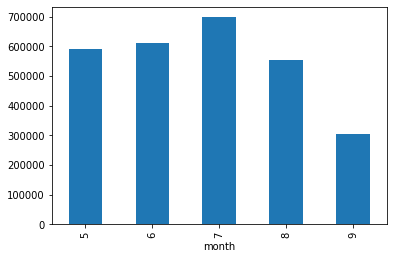

In [32]:
sales.groupby('month').count()['event'].plot(kind='bar')
#may, june, july, aug, sep

In [33]:
#round datetimes by hour, aggregate, see what insights i can discover

In [34]:
sales['timestamp'].dt.round('H')

0         2015-06-02 05:00:00
1         2015-06-02 06:00:00
2         2015-06-02 05:00:00
3         2015-06-02 05:00:00
4         2015-06-02 05:00:00
                  ...        
2756096   2015-08-01 03:00:00
2756097   2015-08-01 04:00:00
2756098   2015-08-01 03:00:00
2756099   2015-08-01 03:00:00
2756100   2015-08-01 04:00:00
Name: timestamp, Length: 2756101, dtype: datetime64[ns]

In [39]:
#same as above but to just pull out the hour
sales['round_hour'] = sales['timestamp'].dt.round('H').dt.hour
sales.head()

,timestamp,visitorid,event,itemid,transactionid,timestapm,date,year,month,quarter,weekday,hour,day,round_hour
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02,2015,6,2,1,5,2,5
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02,2015,6,2,1,5,2,6
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02,2015,6,2,1,5,2,5
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02,2015,6,2,1,5,2,5
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02,2015,6,2,1,5,2,5


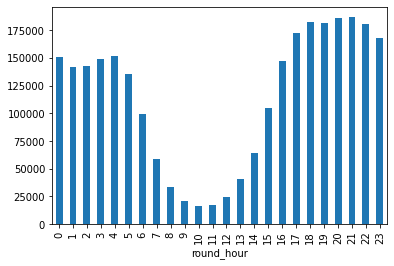

In [41]:
sales.groupby('round_hour').count()['event'].plot(kind='bar')
#same as an hour before but rounded numbers, no difference though